In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

import integrated_gradients as ig
import my_utils
from metaplot import Metaplot, one_hot_encode, meta_untransposed


In [2]:
#load data (20.000 random 5'UTRs of 50nt length)
data = pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/data/MRL_pred.csv', index_col = False)
print('Initital dataset size:', len(data))

#load trained model and predict MRL
mrl_model = tf.keras.models.load_model('/Users/frederickkorbel/Documents/projects/paper/data/seelig/Supplementary Code/modeling/saved_models/main_MRL_model.hdf5')

#remove FP (delta >= 1) and FN (delta >= 2)
data = data[(data['pred'] - data['rl']) <= 1.0] #FP
data = data[(data['rl'] - data['pred']) <= 2.0] #FN
print('After removing FP/FN:', len(data))

#keep only 5'utrs with one uorf
uorf_data = my_utils.analyze(data)[data['orf_number'] == 1][data['aug_number'] == 1]
print('Examples with one uorf:', len(uorf_data))



Initital dataset size: 20000


2022-02-22 15:01:39.712780: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


After removing FP/FN: 19596
Examples with one uorf: 2009


/var/folders/6b/4m6tvsws1rvb767d463fsk7r0000gn/T/ipykernel_6568/1367445923.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uorf_data = my_utils.analyze(data)[data['orf_number'] == 1][data['aug_number'] == 1]


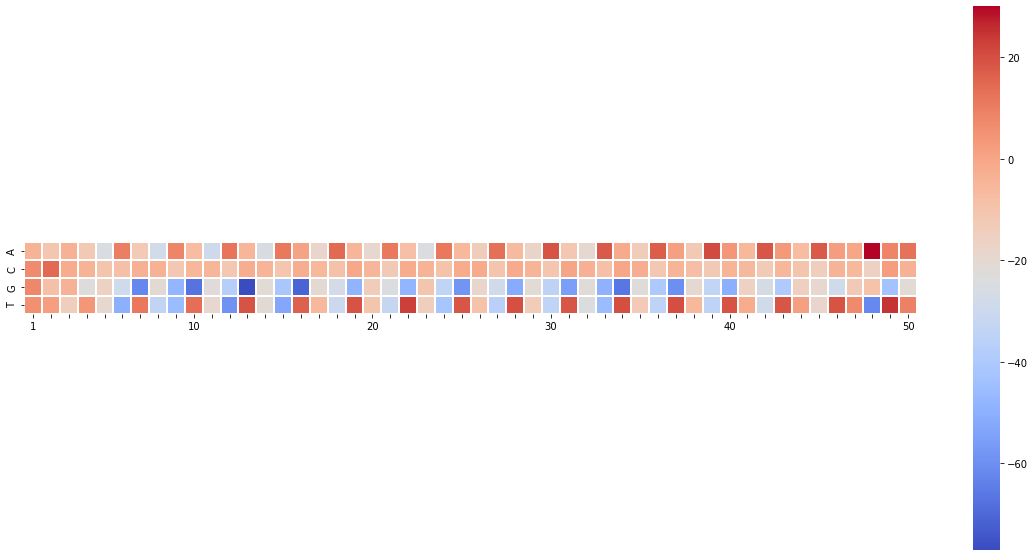

In [3]:
#random subset of the whole dataset
random_data = data.sample(n=2000, random_state = 1)
random_data_seq = one_hot_encode(random_data, seq_len=50)
random_data_ig = ig.integrated_gradients(mrl_model, random_data_seq)
Metaplot(random_data_ig, colorbar = True)

#np.save('/Users/frederickkorbel/Documents/projects/paper/data/meta/random_data_2000_subset', meta_untransposed(random_data_ig))

In [3]:
# Are uorfs distributed normally across the 5'UTR? -> y= frequency, x= nt position

201


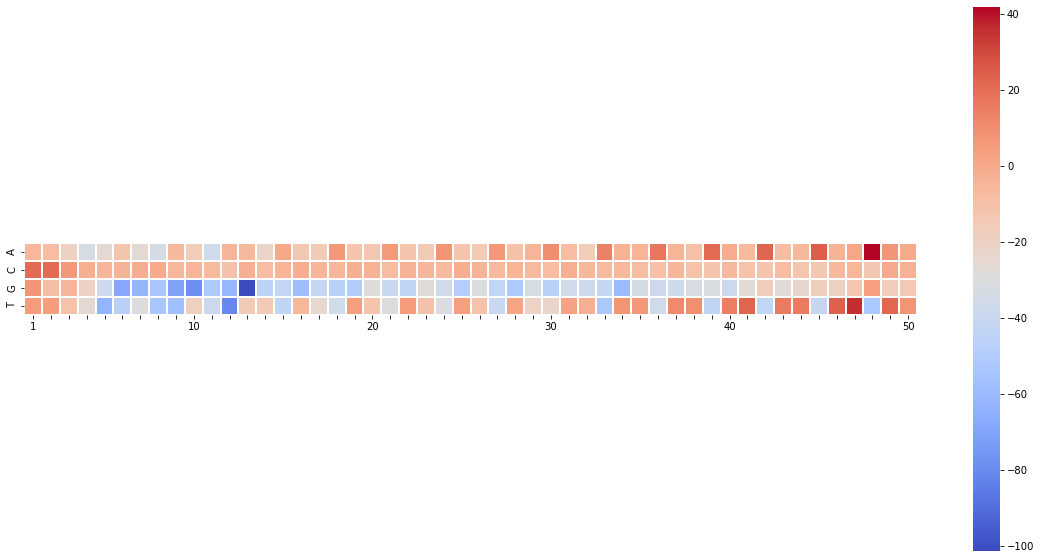

In [4]:
#10th percentile -> 10% of examples with lowest MRL
lowest_ten = uorf_data[uorf_data['pred'] <= uorf_data['pred'].quantile(0.1)]
print(len(lowest_ten))
lowest_ten_seq = one_hot_encode(uorf_data, seq_len=50)
lowest_ten_ig = ig.integrated_gradients(mrl_model, lowest_ten_seq)
Metaplot(lowest_ten_ig, colorbar = True)

#np.save('/Users/frederickkorbel/Documents/projects/paper/data/meta/uorf_10th_percentile', meta_untransposed(lowest_ten_ig))

201


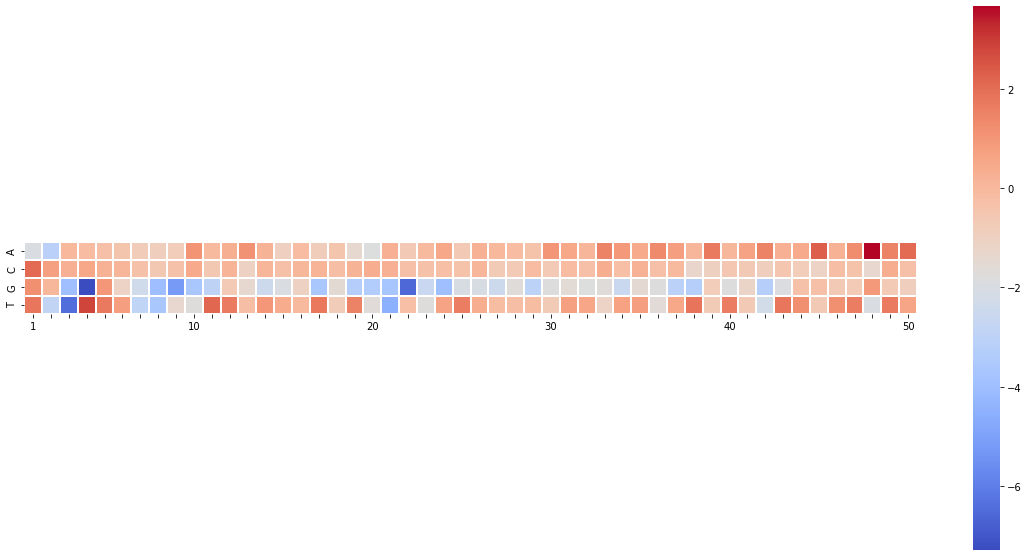

In [5]:
#90th percentile -> 10% of examples with highest MRL
highest_ten = uorf_data[uorf_data['pred'] >= uorf_data['pred'].quantile(0.9)]
print(len(highest_ten))
highest_ten_seq = one_hot_encode(highest_ten, seq_len=50)
highest_ten_ig = ig.integrated_gradients(mrl_model, highest_ten_seq)
Metaplot(highest_ten_ig, colorbar = True)

#np.save('/Users/frederickkorbel/Documents/projects/paper/data/meta/uorf_90th_percentile', meta_untransposed(highest_ten_ig))

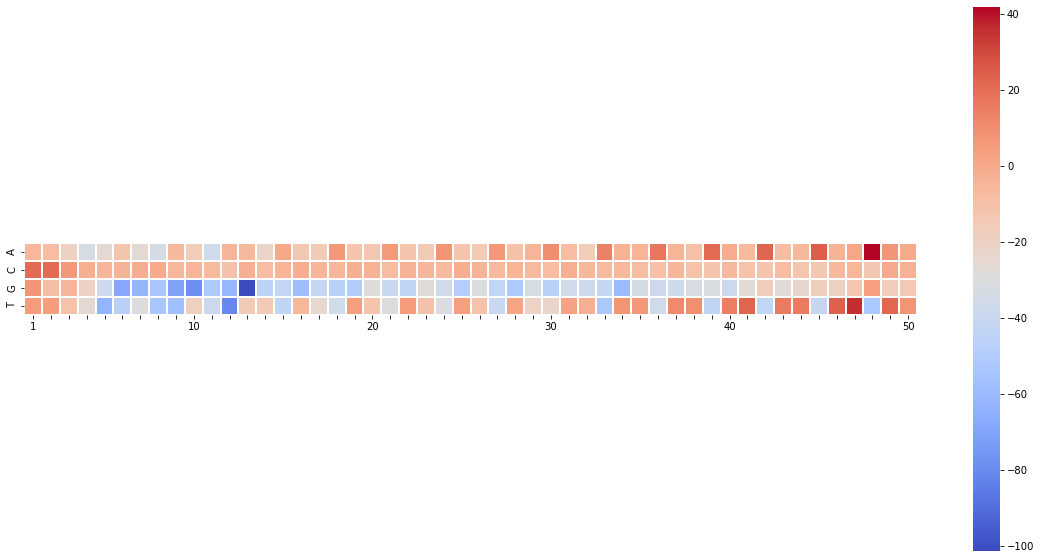

In [6]:
uorf_data_ig = ig.integrated_gradients(mrl_model,one_hot_encode(uorf_data,seq_len=50))
Metaplot(uorf_data_ig, colorbar = True)

#np.save('/Users/frederickkorbel/Documents/projects/paper/data/meta/uorf_data', meta_untransposed(uorf_data_ig))

In [ ]:
#Distributions

#10th percentile

#90th percentile

In [ ]:
#t-test